In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [73]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [74]:
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
x=df.drop(['quality'],axis=1).values
y=df['quality'].values

See if the assumptions for linear regression are fullfiled.

Fitting linear regression

R^2: 0.360551703038688 

Coefficients
-------------------------------------
Intercept: 21.965208449448753
X1: 0.024990552671673816
X2: -1.083590258693442
X3: -0.182563948410716
X4: 0.016331269765475283
X5: -1.8742251580991993
X6: 0.004361333309096438
X7: -0.003264579703068482
X8: -17.881163832496153
X9: -0.41365314382176166
X10: 0.9163344127211326
X11: 0.2761976992268871

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


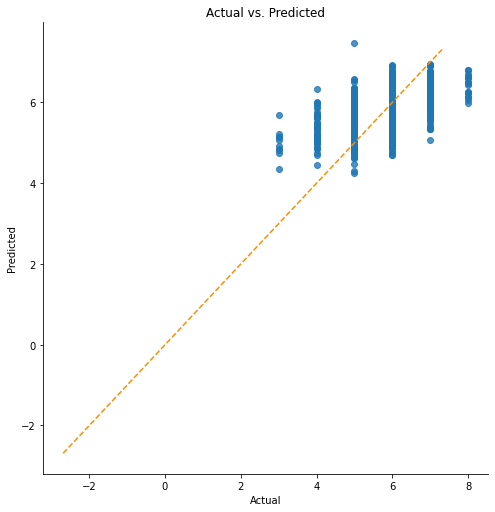

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.175144776315279e-10
Residuals are not normally distributed


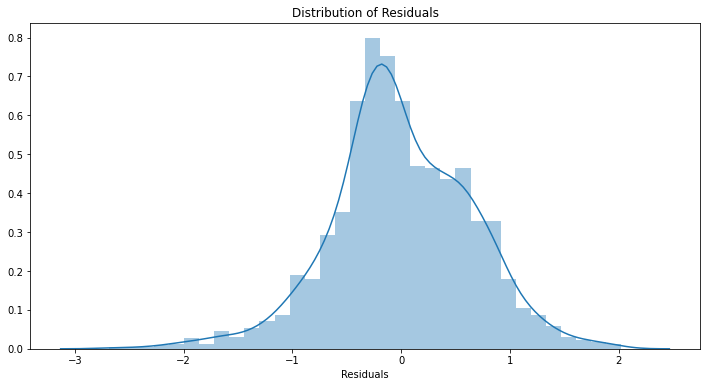


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables

Assumption 3: Little to no multicollinearity among predictors


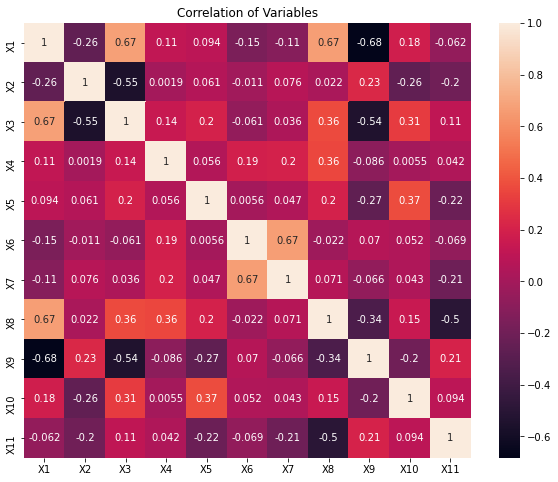

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
X1: 74.45226538735389
X2: 17.060026123932275
X3: 9.183495167192477
X4: 4.662992174051856
X5: 6.5548772185559905
X6: 6.442682022072097
X7: 6.519698942374763
X8: 1479.2872086341736
X9: 1070.9676853792205
X10: 21.5906209233164
X11: 124.39486649768077

6 cases of possible multicollinearity
3 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7571401888792892
Little to no autocorrelation 

Assumption satisfied


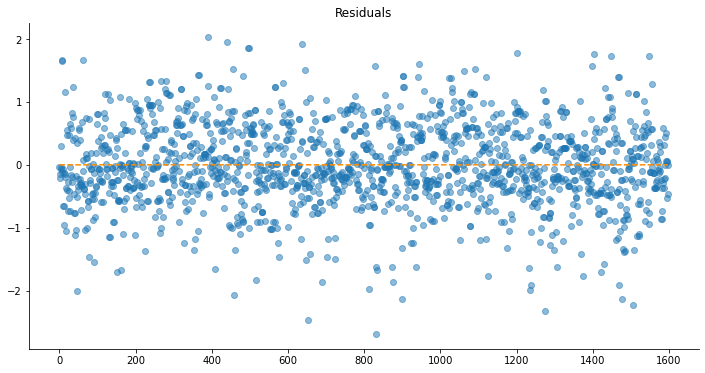

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [121]:
linear_regression_assumptions(x, y)

# evaluate models

In [16]:
def evaluate(df,model):
    x=df.drop(['quality'],axis=1)
    y=df['quality']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    RMSE_score=[]
    for name, model in model:
        model = model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        RMSE_score.append([name,round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)])
    return pd.DataFrame(RMSE_score, columns=['Name','RMSE', 'R Square'])

All of the chosen models are regressor, since the features data type is continuous and the target can be assumed as continuous. Classifier models can also be used, but since the target data available only ranged from 3-8, when it full range is 1-10, using classifier will limit the prediction results on the available target data (prediction results will only ranged on 3-8).  
 
I use regressor to see if I can interpolate the prediction, hence including the unavaible target in the prediction.

In [17]:
models = [
    ['Linear Regression', LinearRegression()],
    ['ElasticNet', ElasticNet()],
    ['Lasso', Lasso()],
    ['Ridge', Ridge()],
    ['DecisionTree', DecisionTreeRegressor()],
    ['RandomForest', RandomForestRegressor()],
    
    ['KNeighbours', KNeighborsRegressor(n_neighbors = 2)],
    ['SVM', SVR()],
    ['AdaBoost', AdaBoostRegressor()],
    ['GradientBoosting', GradientBoostingRegressor()],
    ['BayesianRidge', BayesianRidge()],
    ['Huber', HuberRegressor()]
]

In [18]:
#unprocessed data
evaluate(df,models)

,Name,RMSE,R Square
0,Linear Regression,11.00,0.33
1,ElasticNet,13.22,0.03
2,Lasso,13.23,0.03
3,Ridge,10.98,0.33
4,DecisionTree,14.64,-0.19
5,RandomForest,9.98,0.45
6,KNeighbours,14.06,-0.10
7,SVM,12.22,0.17
8,AdaBoost,11.17,0.31
9,GradientBoosting,10.77,0.36


In [21]:
# drop outliers
df2=pd.read_csv('df_dropoutlier.csv')
df2=df2.drop('Unnamed: 0', axis=1)
evaluate(df2,models)

,Name,RMSE,R Square
0,Linear Regression,10.58,0.36
1,ElasticNet,12.95,0.04
2,Lasso,13.02,0.03
3,Ridge,10.62,0.35
4,DecisionTree,14.76,-0.25
5,RandomForest,10.06,0.42
6,KNeighbours,13.84,-0.10
7,SVM,12.10,0.16
8,AdaBoost,10.64,0.35
9,GradientBoosting,10.22,0.40


In [64]:
# rescale with log
df3=pd.read_csv('df_log.csv')
df3=df3.drop('Unnamed: 0', axis=1)
df3['quality']= df['quality']
evaluate(df3,models)

,Name,RMSE,R Square
0,Linear Regression,10.89,0.34
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,10.87,0.34
4,DecisionTree,14.51,-0.17
5,RandomForest,10.03,0.44
6,KNeighbours,12.73,0.10
7,SVM,10.93,0.34
8,AdaBoost,11.17,0.31
9,GradientBoosting,10.80,0.35


In [63]:
# rescale with squareroot
df4=pd.read_csv('df_sqrt.csv')
df4=df4.drop('Unnamed: 0', axis=1)
df4['quality']= df['quality']
evaluate(df4,models)

,Name,RMSE,R Square
0,Linear Regression,10.90,0.34
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,10.90,0.34
4,DecisionTree,13.96,-0.08
5,RandomForest,10.07,0.44
6,KNeighbours,13.38,0.01
7,SVM,11.13,0.31
8,AdaBoost,11.24,0.30
9,GradientBoosting,10.77,0.36


In [67]:
# robust scaled
df5=pd.read_csv('df_rbscal.csv')
df5=df5.drop('Unnamed: 0', axis=1)
evaluate(df5,models)

,Name,RMSE,R Square
0,Linear Regression,11.00,0.33
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,11.00,0.33
4,DecisionTree,15.17,-0.28
5,RandomForest,10.08,0.44
6,KNeighbours,13.18,0.04
7,SVM,10.79,0.35
8,AdaBoost,11.28,0.29
9,GradientBoosting,10.75,0.36


The best evaluation result is when the data is unprocessed. Random forest regressor consistently gives the best evaluation (lowest error, highest R square). 

# Tunning

## Random Forest

In [97]:
x=df.drop(['quality'],axis=1)
y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
print(y_train.value_counts())
print(y_test.value_counts())

5    546
6    496
7    172
4     42
8     15
3      8
Name: quality, dtype: int64
6    142
5    135
7     27
4     11
8      3
3      2
Name: quality, dtype: int64


In [28]:
criterion=['mae', 'mse']
max_depth=[2,5,10,15,20,50,100] #kedalaman pohon
min_samples_split=[1,2,5,10,20,50,100,250] #jumlah minimal sample sebelum dibagi lagi
min_samples_leaf=[1,2,5,10,20,50,100,250]# jumlah minimal sample per subset data
max_features=['auto', 'sqrt', 'log2'] # jumlah feature yang dipertimbangkan dalam mencari pembagian data terbaik

param_rf={'criterion':criterion,'max_depth':max_depth,'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,'max_features':max_features}

param_rf

{'criterion': ['mae', 'mse'],
 'max_depth': [2, 5, 10, 15, 20, 50, 100],
 'min_samples_split': [1, 2, 5, 10, 20, 50, 100, 250],
 'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 250],
 'max_features': ['auto', 'sqrt', 'log2']}

In [26]:
model_rf=RandomForestRegressor()
model_rf_gs=GridSearchCV(estimator=model_rf,param_grid= param_rf, cv=5)
model_rf_gs.fit(x_train, y_train)
model_rf_gs.best_params_

In [84]:
model=RandomForestRegressor(criterion ='mse',
 max_depth= 100,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame([round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)], columns= ['Score'],index=['RMSE','R Square'])

,Score
RMSE,9.85
R Square,0.46


## ridge regression

In [81]:
alpha= [0.1,0.5,1,2,5,10]
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
max_iter=[None, 10,100,1000]
fit_intercept=[True,False]
param_rr={'alpha':alpha, 'max_iter':max_iter,'solver':solver, 'fit_intercept':fit_intercept}

param_rr

{'alpha': [0.1, 0.5, 1, 2, 5, 10],
 'max_iter': [None, 10, 100, 1000],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
 'fit_intercept': [True, False]}

In [82]:
model_rr=Ridge()
model_rr_gs=GridSearchCV(estimator=model_rr,param_grid= param_rr, cv=5)
model_rr_gs.fit(x_train, y_train)
model_rr_gs.best_params_

{'alpha': 1, 'fit_intercept': True, 'max_iter': None, 'solver': 'svd'}

In [79]:
model=Ridge(alpha=1, solver='svd')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame([round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)], columns= ['Score'],index=['RMSE','R Square'])

,Score
RMSE,10.98
R Square,0.33


The tunning of Random Forest parameters further reduce the error of the model by 1 %. At first I was about to decide with Random Forest model, but further reading about the model told me that Random Forest prediction cannot be interpolated, hence, I will use Ridge regression model instead. I chose Ridge regression since this model is often use to handle data with multicolinearity, which is prevalent in my data.

Ridge regression shows no improvement, meaning that the default parameters was already the best one.

## saving model

In [126]:
import joblib


model=Ridge()

model.fit(x_train, y_train)

#simpan model

joblib.dump(model, 'modelRidge')

['modelRidge']

https://gdcoder.com/random-forest-regressor-explained-in-depth/

https://gdcoder.com/decision-tree-regressor-explained-in-depth/

https://scikit-learn.org/stable/modules/tree.html#tree

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

https://www.statisticshowto.com/ridge-regression/